# Commented exploratory data analysis project

###### Luíza Sabchuk

<p>This notebook was developed with the purpose of demonstrating a simple exploratory analysis of tabular data, using a base taken from Kaggle that informs data regarding delayed or canceled domestic flights in the United States territory in the year 2015.</p>
<p>The main idea is to demonstrate basic but important tools and concepts of exploratory data analysis.</p>
<p>In this analysis, I will try to ask the following questions:
<br> - Which airline has the highest proportion of delays?</br>
<br> - Which airports concentrate the most delays?</br>
<br> - What days of the week are flights delayed the most?</p></br>


<p>The variables contained in the flight table are below, with a description of their meaning:</p>

Name  | Type | Description 
------------- | ------------- | ------------------
DATE | object | The date in python datetime format
MONTH  | int64 | The month of the year(1-12)
DAY  | int64 | The day of the month
DAY_OF_WEEK  | int64 | The day of the week(1-7, MON-SUN)
AIRLINE  | object | An identifier for the airline
FLIGHT_NUMBER  | int64 | The flight number
TAIL_NUMBER   | object | The tail number (aircraft) corresponding to this flight
ORIGIN_AIRPORT  | object | The code for origin airport
DESTINATION_AIRPORT  | object | The code for the destination airport
SCHEDULED_DEPARTURE  | object | The departure time
SCHEDULED_ARRIVAL   | object | The arrival time
DEPARTURE_DELAY  | float64 | The delay incurred at the origin (mins)
ARRIVAL_DELAY   | float64 | The delay when the flight reached the destination (mins)
DISTANCE  | int64 | Distance in miles between origin and destination
SCHEDULED_TIME  | float64 | Scheduled time of flight (mins)
ELAPSED_TIME  | float64 | Actual time of flight (mins)
AIR_SYSTEM_DELAY  | float64 | What part of the delay was NASD?(mins)
SECURITY_DELAY  | float64 | What part of the delay was due to security problems?(mins)
AIRLINE_DELAY  | float64 | What part of the delay is due to the airline? (mins)
LATE_AIRCRAFT_DELAY  | float64 | What part of the delay is due to previous flight(s) being late? (mins)
WEATHER_DELAY  | float64 | Delay due to extreme weather events(min)

<p>Importing the libraries that will be used in the analysis:</p>

In [60]:
import datetime, warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

<p>We have three databases in this Kaggle base: airports.csv, airlines.csv and flights.csv (this one with 31 columns). The table airports.csv give us informations about the airports, and the table airlines.csv tell us about the airlines that operated in the domestic flights in USA in 2015. The table flights.csv gives us a lot of specific information about flights, such as estimated arrival and departure times, actual take-off and landing times, as well as the days of the month and week for each information.</p>

In [61]:
df_flights = pd.read_csv("/Users/sabchukibm/data/flights.csv", low_memory=False)
df_airlines = pd.read_csv("/Users/sabchukibm/data/airlines.csv")
df_airports = pd.read_csv("/Users/sabchukibm/data/airports.csv")

In [62]:
#getting info about the data and its structure
print("\nAIRLINES OVERVIEW:")
print("rows:", df_airlines.shape[0], "columns:", df_airlines.shape[1])

print("\nAIRPORTS OVERVIEW:")
print("rows:", df_airports.shape[0], "columns:", df_airports.shape[1])

print("\nFLIGHTS OVERVIEW:")
print("rows:", df_flights.shape[0], "columns:", df_flights.shape[1])


AIRLINES OVERVIEW:
rows: 14 columns: 2

AIRPORTS OVERVIEW:
rows: 322 columns: 7

FLIGHTS OVERVIEW:
rows: 5819079 columns: 31


In [63]:
#Basic statistics of the Flights dataframe
df_flights.describe() 

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


<p>The date and time data in the columns YEAR, MONTH and DAY can be converted to a more convenient format for viewing:</p>

In [64]:
df_flights['DATE'] = pd.to_datetime(df_flights[['YEAR','MONTH', 'DAY']])

<p>In the SCHEDULED_DEPARTURE column, the takeoff time is a float and is in military format, where the first two digits indicate the hour and the last two digits the minutes. This format is not convenient for viewing, and to convert them, as well as combine the take-off time with the flight date, some functions will be defined:</p>

In [65]:
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

In [66]:
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

In [67]:
#Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

<p>Finally, functions must be called to change variables that contain dates and times, as shown in the following code block:</p>

In [68]:
df_flights['SCHEDULED_DEPARTURE'] = create_flight_time(df_flights, 'SCHEDULED_DEPARTURE')
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(format_heure)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(format_heure)
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(format_heure)

df_flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]


,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


### Cleaning and preparing data
<p>First, columns that will not be relevant for this analysis will be excluded.</p>

In [69]:
df_flights = df_flights.drop('YEAR', axis = 1)
df_flights = df_flights.drop('FLIGHT_NUMBER', axis=1)
df_flights = df_flights.drop('TAIL_NUMBER', axis=1)
df_flights = df_flights.drop('DEPARTURE_TIME', axis=1)
df_flights = df_flights.drop('TAXI_OUT', axis=1)
df_flights = df_flights.drop('WHEELS_OFF', axis=1)
df_flights = df_flights.drop('SCHEDULED_TIME', axis=1)
df_flights = df_flights.drop('ELAPSED_TIME', axis=1)
df_flights = df_flights.drop('AIR_TIME', axis=1)
df_flights = df_flights.drop('WHEELS_ON', axis=1)
df_flights = df_flights.drop('TAXI_IN', axis=1)
df_flights = df_flights.drop('ARRIVAL_TIME', axis=1)
df_flights = df_flights.drop('DIVERTED', axis=1)

<p>To facilitate the analysis, a column called "Status" will be created to classify flights into "canceled", "on time" and "delayed". </p>

In [70]:
df_flights.loc[df_flights['CANCELLED'] == 1, 'STATUS'] = 'cancelled'
df_flights.loc[df_flights['ARRIVAL_DELAY'] < 15, 'STATUS'] = 'on time'
df_flights.loc[df_flights['ARRIVAL_DELAY'] >= 15, 'STATUS'] = 'delayed'

<p>And for better visualization, the dataframe columns will be rearranged.</p>

In [71]:
df_flights = df_flights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'STATUS', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [72]:
#That's how the dataframe looks like now!
display(df_flights.head(n=5))

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,ANC,SEA,1448,2015-01-01 00:05:00,04:30:00,on time,-11.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,LAX,PBI,2330,2015-01-01 00:10:00,07:50:00,on time,-8.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,SFO,CLT,2296,2015-01-01 00:20:00,08:06:00,on time,-2.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,LAX,MIA,2342,2015-01-01 00:20:00,08:05:00,on time,-5.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,SEA,ANC,1448,2015-01-01 00:25:00,03:20:00,on time,-1.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN


<p>One of the purposes of this analysis is to verify whether the delays are related to the airline. For this, a second dataframe will be created, with only the delay data and their reasons. Only the ones that have an actual explicit reason for the delay will be output. This strategy was adopted in the face of the high number of data in the dataframe.</p>

In [73]:
df_flights_delay = df_flights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'STATUS', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

<p>As the first 10 columns do not have missing values, data referring to canceled flights and rows that do not have information about the nature of the delay will be eliminated. The volume of valid data for analysis decreases.</p>


In [74]:
df_flights_delay = df_flights_delay.dropna(thresh=11) 

In [75]:
display(df_flights_delay.head(n=5))

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,1,1,4,NK,MSP,FLL,1487,2015-01-01 01:15:00,05:42:00,delayed,25.0,0.0,0.0,0.0,0.0
30,1,1,4,NK,PHX,ORD,1440,2015-01-01 01:25:00,05:49:00,delayed,43.0,0.0,0.0,0.0,0.0
35,1,1,4,HA,LAS,HNL,2762,2015-01-01 01:45:00,05:55:00,delayed,0.0,0.0,15.0,0.0,0.0
50,1,1,4,B6,BQN,MCO,1129,2015-01-01 03:07:00,05:00:00,delayed,20.0,0.0,0.0,0.0,0.0
52,1,1,4,B6,SJU,MCO,1189,2015-01-01 04:00:00,06:05:00,delayed,0.0,0.0,85.0,0.0,0.0


In [76]:
print("rows:", df_flights_delay.shape[0], "columns:", df_flights_delay.shape[1])

rows: 1063439 columns: 15


<p>Where before we had 58,109,079 rows of data spread over 31 columns, we now have 1,063,439 rows across 15 columns. This data will be useful to check if there is a relationship between delays and airlines. It is important to note that this new dataframe has no missing values, an approach that will be used to refine the data available in the next steps.</p>

<p>For the analysis regarding the days of the week with the most delays and the airports with the greatest number of delays, a second dataframe will be created. The lines below also contain cleaning the data from the new dataframe.</p>

In [77]:
df_flights_2 = df_flights.copy()

#only keeping non-cancelled flights (the value being 0)
df_flights_2 = df_flights_2[df_flights_2['CANCELLED'] == 0]


In [78]:
df_flights_2 = df_flights_2.drop('CANCELLED', axis=1)
df_flights_2 = df_flights_2.drop('CANCELLATION_REASON', axis=1)
df_flights_2 = df_flights_2.drop('AIR_SYSTEM_DELAY', axis=1) 
df_flights_2 = df_flights_2.drop('SECURITY_DELAY', axis=1)
df_flights_2 = df_flights_2.drop('AIRLINE_DELAY', axis=1) 
df_flights_2 = df_flights_2.drop('LATE_AIRCRAFT_DELAY', axis=1)
df_flights_2 = df_flights_2.drop('WEATHER_DELAY', axis=1)

In [79]:
#tdropping rows that have NA's
df_flights_2 = df_flights_2.dropna(subset = ['ARRIVAL_DELAY'])

<p>As a data preparation measure for the future, dataframes with airport and airline data will be rearranged into dictionaries.</p>

In [80]:
#for airlines
df_airlines_names = df_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

#for airports
df_airports_names = df_airports.set_index('IATA_CODE')['AIRPORT'].to_dict()

<p>After all the data cleaning and preparation techniques, the four datasets that will be used for the analysis have the following configurations:</p>

In [81]:
print("\n\nAIRLINES DATASET:")
print("rows:", df_airlines.shape[0])
print("columns:", df_airlines.shape[1])
display(df_airlines.head(n=5))

print("\n\nAIRPORTS DATASET:")
print("rows:", df_airports.shape[0])
print("columns:", df_airports.shape[1])
display(df_airports.head(n=5))

print("\n\nALL FLIGHTS DATASET:")
print("rows:", df_flights_2.shape[0])
print("columns:", df_flights_2.shape[1])
display(df_flights_2.head(n=5))

print("\n\nDELAY REASONS DATASET:")
print("rows:", df_flights_delay.shape[0])
print("columns:", df_flights_delay.shape[1])
display(df_flights_delay.head(n=5))



AIRLINES DATASET:
rows: 14
columns: 2


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways




AIRPORTS DATASET:
rows: 322
columns: 7


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447




ALL FLIGHTS DATASET:
rows: 5714008
columns: 12


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,DEPARTURE_DELAY,ARRIVAL_DELAY
0,1,1,4,AS,ANC,SEA,1448,2015-01-01 00:05:00,04:30:00,on time,-11.0,-22.0
1,1,1,4,AA,LAX,PBI,2330,2015-01-01 00:10:00,07:50:00,on time,-8.0,-9.0
2,1,1,4,US,SFO,CLT,2296,2015-01-01 00:20:00,08:06:00,on time,-2.0,5.0
3,1,1,4,AA,LAX,MIA,2342,2015-01-01 00:20:00,08:05:00,on time,-5.0,-9.0
4,1,1,4,AS,SEA,ANC,1448,2015-01-01 00:25:00,03:20:00,on time,-1.0,-21.0




DELAY REASONS DATASET:
rows: 1063439
columns: 15


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,1,1,4,NK,MSP,FLL,1487,2015-01-01 01:15:00,05:42:00,delayed,25.0,0.0,0.0,0.0,0.0
30,1,1,4,NK,PHX,ORD,1440,2015-01-01 01:25:00,05:49:00,delayed,43.0,0.0,0.0,0.0,0.0
35,1,1,4,HA,LAS,HNL,2762,2015-01-01 01:45:00,05:55:00,delayed,0.0,0.0,15.0,0.0,0.0
50,1,1,4,B6,BQN,MCO,1129,2015-01-01 03:07:00,05:00:00,delayed,20.0,0.0,0.0,0.0,0.0
52,1,1,4,B6,SJU,MCO,1189,2015-01-01 04:00:00,06:05:00,delayed,0.0,0.0,85.0,0.0,0.0


### Data Descriptive Analysis

#### Which airline has the highest proportion of delays?

<p>With the data ready, exploratory analysis can be performed. The first issue that will be analyzed is about airlines and their delays. With the airline data, a table will first be created with descriptive data (based on arrival delays, which account for the overall delay of a given flight), with the following parameters:<p>
<li>Count of delayed flights per airline;</li>
<li>Count of flights that were on time by airline;</li>
<li>Average, median, maximum and minimum delay times calculations by airline.</li>

In [82]:
al_delayed_count = df_flights_2.groupby('AIRLINE')['STATUS'].value_counts()
al_delayed_count = al_delayed_count.drop(labels='on time', level=1) 
al_delayed_count.index = al_delayed_count.index.get_level_values(0)

In [83]:
al_on_time_count = df_flights_2.groupby('AIRLINE')['STATUS'].value_counts()
al_on_time_count = al_on_time_count.drop(labels='delayed', level=1)
al_on_time_count.index = al_on_time_count.index.get_level_values(0)

In [84]:
al_delay_mean = df_flights_2.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
al_delay_median = df_flights_2.groupby('AIRLINE')['ARRIVAL_DELAY'].median()
al_delay_max = df_flights_2.groupby('AIRLINE')['ARRIVAL_DELAY'].max()
al_delay_min = df_flights_2.groupby('AIRLINE')['ARRIVAL_DELAY'].min()

<p>Grouping all these parameters results into a pandas dataframe (rows two and three of the code are merely for table organization):</p>

In [85]:
df_flights_stats = pd.DataFrame({'delayed flights count': al_delayed_count, 'on time flights count': al_on_time_count, 'delay mean': al_delay_mean, 'delay median': al_delay_median, 'delay max': al_delay_max, 'delay min': al_delay_min})
df_flights_stats = df_flights_stats[['delayed flights count', 'on time flights count', 'delay mean', 'delay median', 'delay min', 'delay max']]
df_flights_stats.reset_index(inplace=True)

<p>Now is the time to use the dictionaries that were created previously, to replace the IATA codes with the name of the airline:</p>

In [86]:
df_flights_stats = df_flights_stats.replace({"AIRLINE": df_airlines_names})

<p>A column will be added to compute the percentage of delayed flights by airline (considering the number of flights operated by each airline), for a numerical view of delays:</p>

In [87]:
df_flights_stats['percentage of delayed flights'] = (100*df_flights_stats['delayed flights count'])/df_flights_stats['on time flights count']
df_flights_stats['percentage of delayed flights'] = df_flights_stats['percentage of delayed flights'].round(2) #rounding the values

print("Summary statistics per airline:")
display(df_flights_stats)


Summary statistics per airline:


,AIRLINE,delayed flights count,on time flights count,delay mean,delay median,delay min,delay max,percentage of delayed flights
0,American Airlines Inc.,130279,582656,3.451372,-6.0,-87.0,1971.0,22.36
1,Alaska Airlines Inc.,22352,149087,-0.976563,-5.0,-82.0,950.0,14.99
2,JetBlue Airways,59175,202867,6.677861,-5.0,-76.0,1002.0,29.17
3,Delta Air Lines Inc.,118023,752252,0.186754,-8.0,-79.0,1274.0,15.69
4,Atlantic Southeast Airlines,109184,445568,6.585379,-4.0,-64.0,1223.0,24.50
5,Frontier Airlines Inc.,23570,66520,12.504706,-1.0,-73.0,1101.0,35.43
6,Hawaiian Airlines Inc.,8618,67423,2.023093,-2.0,-67.0,1467.0,12.78
7,American Eagle Airlines Inc.,60547,218244,6.457873,-6.0,-63.0,1528.0,27.74
8,Spirit Air Lines,34221,80972,14.471800,0.0,-60.0,833.0,42.26
9,Skywest Airlines Inc.,107795,469019,5.845652,-4.0,-69.0,1372.0,22.98


In [88]:
df_airlines_2 = df_flights_2['AIRLINE'].value_counts()
df_airlines_2 = pd.DataFrame(df_airlines_2)
df_airlines_2.rename(columns={'AIRLINE':'COUNT'}, inplace=True)
df_airlines_2.reset_index(inplace=True)
df_airlines_2 = df_airlines_2.replace({"index": df_airlines_names})

print("\nTop 10 busiest airlines in the data:")
display(df_airlines_2.head(n=10))


Top 10 busiest airlines in the data:


,index,COUNT
0,Southwest Airlines Co.,1242403
1,Delta Air Lines Inc.,870275
2,American Airlines Inc.,712935
3,Skywest Airlines Inc.,576814
4,Atlantic Southeast Airlines,554752
5,United Air Lines Inc.,507762
6,American Eagle Airlines Inc.,278791
7,JetBlue Airways,262042
8,US Airways Inc.,194223
9,Alaska Airlines Inc.,171439


<p>According to the data in the statistics table, in terms of percentage, the airline with the highest number of delays in 2015 was Spirit Air Lines (of the 115,193 flights operated by the company, 34,221 flights were delayed, which represents around 42% of flights).</p>
<p>However, in terms of sheer quantity, Southwest Airlines Co. was the airline with the highest number of delays (236,626 delayed flights out of 1,242,403 flights operated by the company in 2015).</p>
<p>Despite the volume of delays of this company, when compared to the number of flights operated, delays did not reach 25% of total flights.</p>
<p>Thus, Southwest Airlines Co. isn't among the companies that most delayed flights in 2015. The following charts demonstrate the analysis visually:</p>

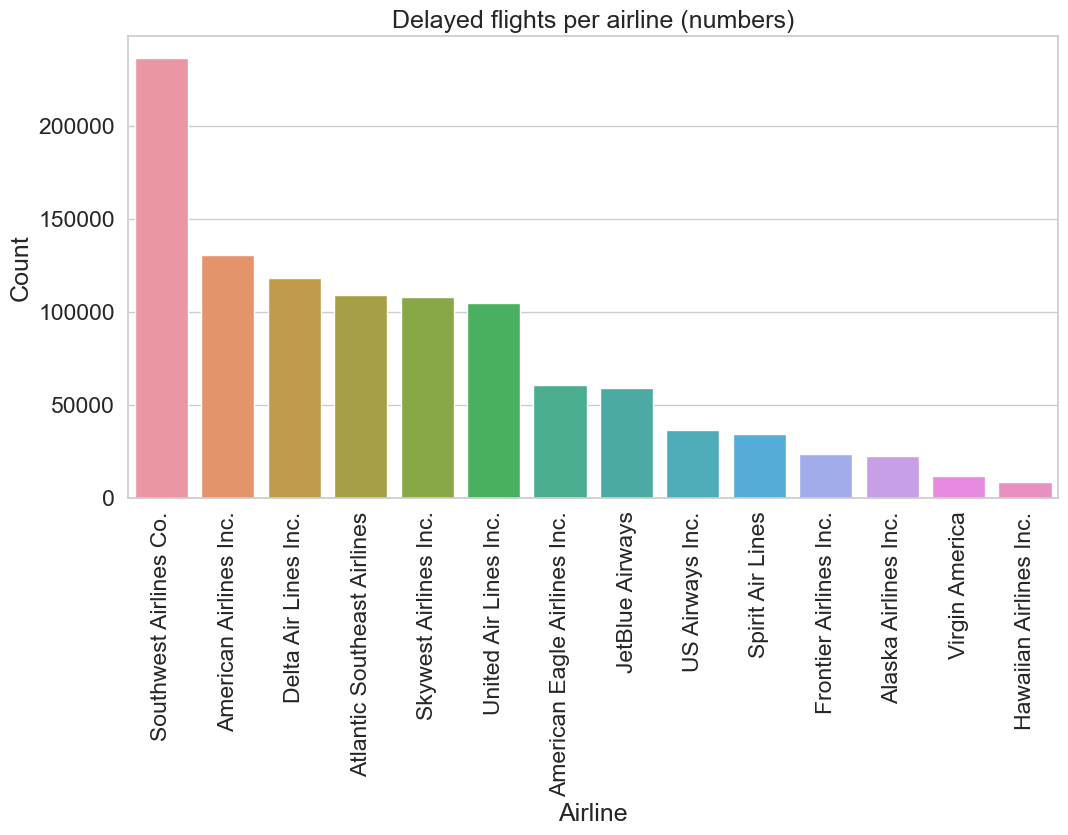

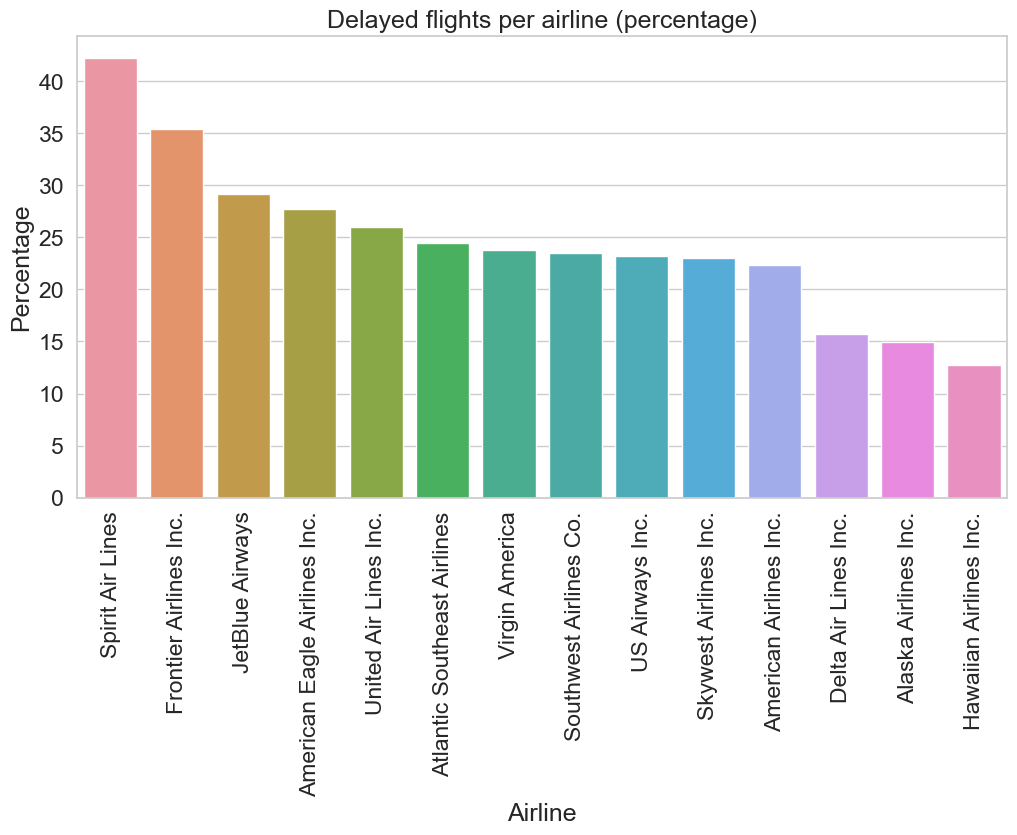

In [89]:
df_flights_stats = df_flights_stats.sort_values(by='delayed flights count', ascending=False)
df_flights_stats = df_flights_stats.reset_index(drop=True)

sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette = "pastel")
plt.figure(figsize=(12,6))
sns.barplot(x=df_flights_stats['AIRLINE'], y=df_flights_stats['delayed flights count'])
plt.xticks(rotation= 90)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Delayed flights per airline (numbers)')
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------
df_flights_stats = df_flights_stats.sort_values(by='percentage of delayed flights', ascending=False)
df_flights_stats = df_flights_stats.reset_index(drop=True)

sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette = "pastel")
plt.figure(figsize=(12,6))
sns.barplot(x=df_flights_stats['AIRLINE'], y=df_flights_stats['percentage of delayed flights'])
plt.xticks(rotation= 90)
plt.xlabel('Airline')
plt.ylabel('Percentage')
plt.title('Delayed flights per airline (percentage)')
plt.show()


#### Which airports concentrate the most delays?

<p>In an attempt to answer the second question initially raised, we will analyze which were the busiest airports in the US in 2015 and which airports concentrated the greatest number of delays in the period. It is important to note that these data refer to domestic flights. International flights can represent a much larger number, and indicate other busier airports.</p>

In [90]:
#busiest airports

df_airports_busy = df_flights_2['ORIGIN_AIRPORT'].value_counts()
df_airports_busy = pd.DataFrame(df_airports_busy)
df_airports_busy.rename(columns={'ORIGIN_AIRPORT':'COUNT'}, inplace=True)
df_airports_busy.reset_index(inplace=True)
df_airports_busy = df_airports_busy.replace({"index": df_airports_names})

print("\nTop 10 busiest airports in the data:")
display(df_airports_busy.head(n=10))
#-----------------------------------------------------------------------------------------------------------------------------------------

#delayed airports

df_airports_2 = df_flights_2.groupby('ORIGIN_AIRPORT')['STATUS'].value_counts()
df_airports_2 = df_airports_2.drop(labels='on time', level=1)
df_airports_2.index = df_airports_2.index.get_level_values(0)
df_airports_2 = pd.DataFrame(df_airports_2)
df_airports_2['ORIGIN_AIRPORT'] = df_airports_2.index
df_airports_2 = df_airports_2[['ORIGIN_AIRPORT', 'STATUS']]
df_airports_2 = df_airports_2.replace({"ORIGIN_AIRPORT": df_airports_names})

#sorting values
df_airports_2 = df_airports_2.sort_values(by='STATUS', ascending=False)
df_airports_2 = df_airports_2.reset_index(drop=True)

print("Top 10 airports with the most flight delays in the data:")
display(df_airports_2.head(10))



Top 10 busiest airports in the data:


,index,COUNT
0,Hartsfield-Jackson Atlanta International Airport,343506
1,Chicago O'Hare International Airport,276554
2,Dallas/Fort Worth International Airport,232647
3,Denver International Airport,193402
4,Los Angeles International Airport,192003
5,Phoenix Sky Harbor International Airport,145552
6,San Francisco International Airport,145491
7,George Bush Intercontinental Airport,144019
8,McCarran International Airport,131937
9,Minneapolis-Saint Paul International Airport,111055


Top 10 airports with the most flight delays in the data:


,ORIGIN_AIRPORT,STATUS
0,Chicago O'Hare International Airport,66663
1,Hartsfield-Jackson Atlanta International Airport,56462
2,Dallas/Fort Worth International Airport,50478
3,Denver International Airport,43331
4,Los Angeles International Airport,40281
5,George Bush Intercontinental Airport,30690
6,San Francisco International Airport,29534
7,Phoenix Sky Harbor International Airport,27427
8,McCarran International Airport,27225
9,LaGuardia Airport (Marine Air Terminal),22709


<p>As indicated, the busiest airport was Hartsfield-Jackson Atlanta International Airport, which was the second airport with the highest concentration of delays. On the other hand, Chicago O'Hare International Airport had the most delays but was the second busiest. It can be concluded that the volume of delays at an airport is related to how busy the airport is.</p>

### Which days of the week are flights delayed the most?

<p>We will now check which days of the week have the highest number of delays (analyzing all airports). A table will be created with the count of flight status on each day of the week ("on time" and "delayed"), and a pivot table for proportion with a column computing the frequency.</p>

In [91]:
#flight status count table

weekday_status = df_flights_2.groupby('DAY_OF_WEEK')['STATUS'].value_counts()
weekday_status = pd.DataFrame(weekday_status)
weekday_status.rename(columns={'STATUS':'COUNT'}, inplace=True)
weekday_status.reset_index(inplace=True)

weekday_dictionary = {1 : "Mon", 2 : "Tue", 3 : "Wed", 4 : "Thu", 5 : "Fri", 6 : "Sat", 7 : "Sun"}
weekday_status = weekday_status.replace({"DAY_OF_WEEK": weekday_dictionary})
display(weekday_status.head(15)) #this table is small, it can be shown in its entirety
#-----------------------------------------------------------------------------------------------------------------
#pivot table

weekday_pivot = weekday_status.pivot(index='DAY_OF_WEEK', columns='STATUS', values='COUNT')
weekday_pivot.reset_index(inplace=True)
weekday_pivot= weekday_pivot.reset_index(drop=True)
weekday_pivot['frequency of delayed flights'] = weekday_pivot['delayed']/weekday_pivot['on time']
weekday_pivot['frequency of delayed flights'] = weekday_pivot['frequency of delayed flights'].round(2)

weekday_pivot = weekday_pivot.replace({"DAY_OF_WEEK": weekday_dictionary})
display(weekday_pivot.head(8))

,DAY_OF_WEEK,STATUS,COUNT
0,Mon,on time,675528
1,Mon,delayed,166266
2,Tue,on time,676216
3,Tue,delayed,151183
4,Wed,on time,689638
5,Wed,delayed,153604
6,Thu,on time,686194
7,Thu,delayed,171692
8,Fri,on time,687946
9,Fri,delayed,163441


STATUS,DAY_OF_WEEK,delayed,on time,frequency of delayed flights
0,Fri,163441,687946,0.24
1,Mon,166266,675528,0.25
2,Sat,110315,579430,0.19
3,Sun,146938,655617,0.22
4,Thu,171692,686194,0.25
5,Tue,151183,676216,0.22
6,Wed,153604,689638,0.22


<p>The best way to visualize this data and draw our conclusions is through graphs. The first graph shows the number of on-time and delayed flights on each day of the week. The second shows the proportions.</p>

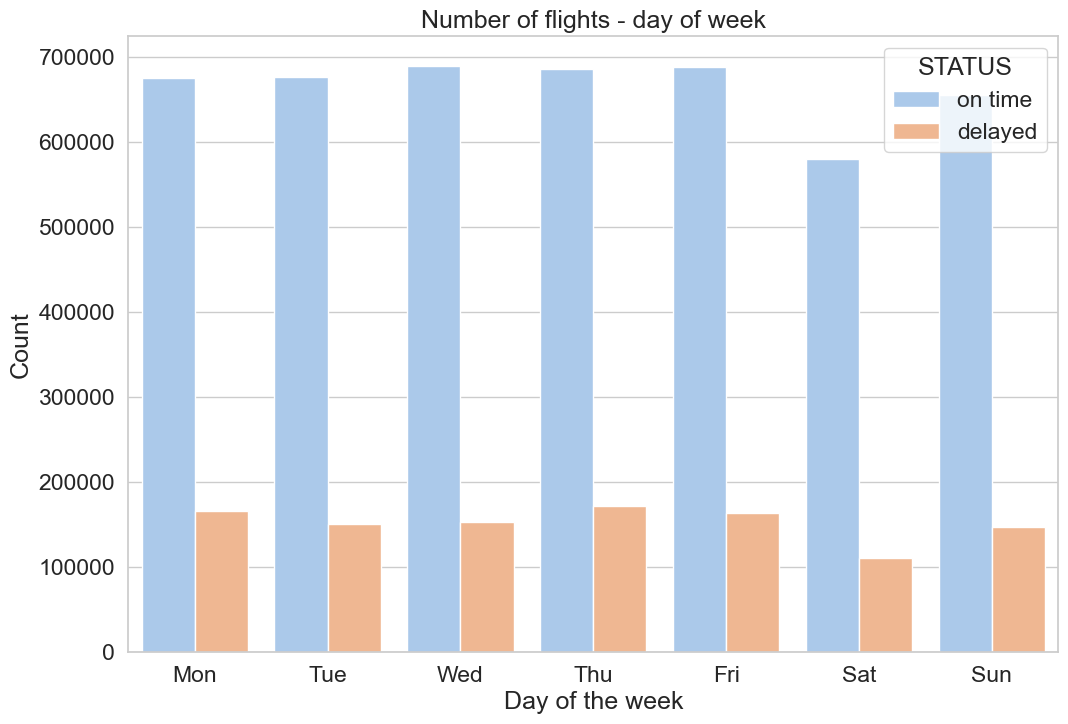

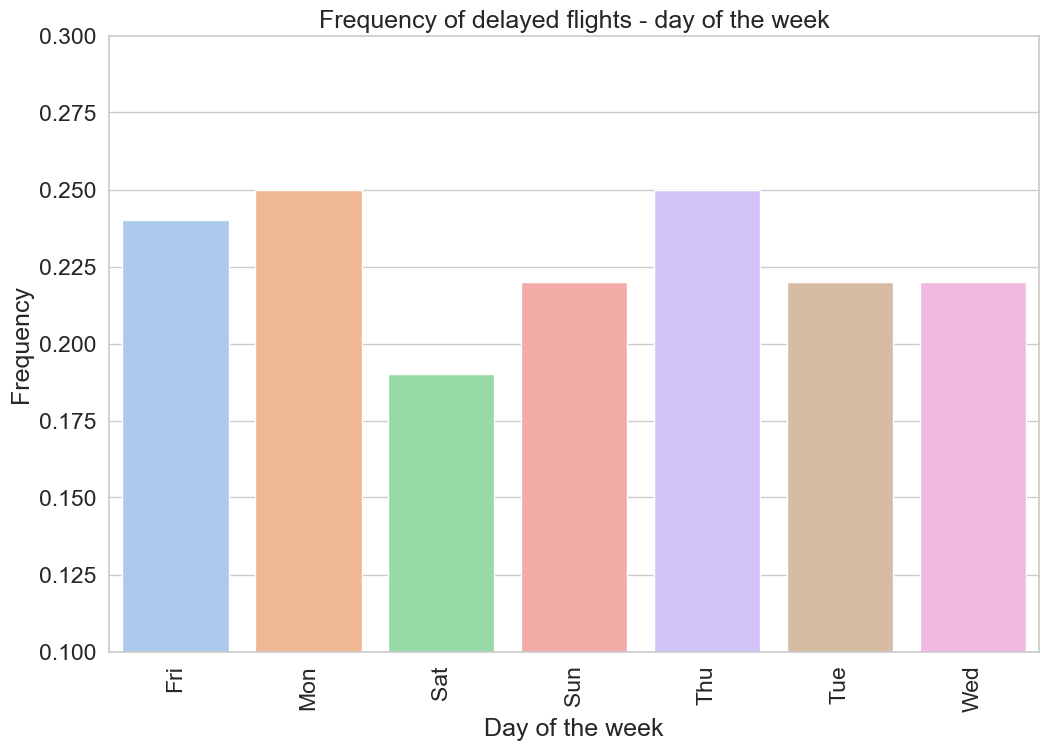

In [92]:

sns.set(style="whitegrid", color_codes=True, font_scale=1.5) 
sns.set_palette(palette = "pastel")
plt.figure(figsize=(12,8))
ax = sns.barplot(x='DAY_OF_WEEK', y='COUNT', hue='STATUS', data=weekday_status)
ax.set(xlabel='Day of the week', ylabel='Count')
ax.set_title("Number of flights - day of week") 
plt.show()
#---------------------------------------------------------------------------------------------------------

sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
sns.set_palette(palette = "pastel")
plt.figure(figsize=(12,8))
sns.barplot(x=weekday_pivot['DAY_OF_WEEK'], y=weekday_pivot['frequency of delayed flights'])
plt.xticks(rotation= 90)
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Frequency of delayed flights - day of the week')
plt.ylim(0.10, 0.3)
plt.show()



<p>According to the graphs, the day of the week that concentrated the highest number of delays was Thursday (171,692 flights delayed on Thursday in the year 2015), but the frequency of delays is the same as on Monday. The frequency of delays on Saturday is noteworthy: this may be due to the movement at airports on that day, which is usually lower compared to other days of the week.</p>

### Conclusion

<p>From the initial questions, it was possible to conclude that the airline that recorded the highest proportion of delays was Spirit Airlines (this is an airline to be avoided!): out of every 100 flights, around 42 of them were delayed. No details were given about the reasons for the delays in this analysis.</p>

<p>Regarding airports, the busiest airport in the USA (and also in the world in the year analyzed - 2015) ranked second in number of delays. Again, the reasons for the delays were not analyzed, but it can be concluded that, despite the volume of flights operated that year, the airport management was somehow efficient, since Chicago airport was the one that registered the greater number of delays.</p>

<p>Regarding the days of the week that recorded the most delays, the fact that Mondays are busy days is a known fact. What caught our attention was that Thursday was a busy day that year (with the highest number of delays).</p>